In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as an
import sklearn.metrics
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture as GMM
from scipy.stats import norm

In [2]:
#adata=sc.read(results_file_post)
#adata.uns['log1p'] = {"base":None}

Set up out properties

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.3 anndata==0.10.7 umap==0.5.5 numpy==1.26.4 scipy==1.13.0 pandas==2.2.2 scikit-learn==1.4.2 statsmodels==0.14.1 python-igraph==0.10.4 pynndescent==0.5.12


In [4]:
#%matplotlib inline

Set scanpy out-files

In [5]:
writeDir = "write/"

fileName = "pdacPdxMrtx106"

resultsFileQC = writeDir + fileName + '_QC.h5ad' 


The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


Set figure parameters

In [6]:
sc.set_figure_params(scanpy=True, dpi=100, dpi_save=150, fontsize=10, format='png')
sc.settings.figdir = "figures/" + fileName + "/"
figName = fileName

read input file

In [7]:
inDir = 'data/'
#inputFile = f'{inDir}/.txt'
#inMetaFile = f'{inDir}/.txt'

In [8]:
adata = sc.read_10x_h5(f"{inDir}PC106_mrtx.h5", gex_only=False)
adata

reading data/PC106_mrtx.h5
 (0:00:00)


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 3222 × 68890
    var: 'gene_ids', 'feature_types', 'genome'

In [9]:
adata.var

,gene_ids,feature_types,genome
GRCh38_MIR1302-2HG,GRCh38_ENSG00000243485,Gene Expression,GRCh38
GRCh38_FAM138A,GRCh38_ENSG00000237613,Gene Expression,GRCh38
GRCh38_OR4F5,GRCh38_ENSG00000186092,Gene Expression,GRCh38
GRCh38_AL627309.1,GRCh38_ENSG00000238009,Gene Expression,GRCh38
GRCh38_AL627309.3,GRCh38_ENSG00000239945,Gene Expression,GRCh38
...,...,...,...
mm10___AC149090.1,mm10___ENSMUSG00000095041,Gene Expression,mm10
PC106-ANS188-MRTX1-B0255,MRTX1-PC106,Antibody Capture,
PC106-ANS189-MRTX2-B0256,MRTX2-PC106,Antibody Capture,
PC106-ANS190-MRTX3-B0257,MRTX3-PC106,Antibody Capture,


In [10]:
numGenes = 4

hto = adata[:,-numGenes:]
adata = adata[:,:-numGenes]
adata.obs = pd.DataFrame(hto.X.todense(), columns=hto.var_names, index=adata.obs.index)

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [11]:
adata.obs

,PC106-ANS188-MRTX1-B0255,PC106-ANS189-MRTX2-B0256,PC106-ANS190-MRTX3-B0257,PC106-ANS191-MRTX4-B0258
AAACCCAGTAGATTAG-1,23.0,3412.0,32.0,88.0
AAACCCAGTGTTGCCG-1,22.0,237.0,9.0,1559.0
AAACGAACAGTGCGCT-1,22.0,259.0,15.0,1677.0
AAACGAAGTCTGCAAT-1,22.0,7728.0,56.0,119.0
AAACGCTAGATCGGTG-1,6.0,187.0,11.0,1242.0
...,...,...,...,...
TTTGGTTCAGCCTACG-1,33.0,292.0,13.0,472.0
TTTGTTGCAAGTATCC-1,24.0,250.0,13.0,1558.0
TTTGTTGCAGGTGTTT-1,660.0,10344.0,80.0,101.0
TTTGTTGGTGAGTAGC-1,39.0,11278.0,89.0,112.0


In [12]:
adata.var_names_make_unique()
adata.obs_names_make_unique()

In [13]:
adata.obs 

,PC106-ANS188-MRTX1-B0255,PC106-ANS189-MRTX2-B0256,PC106-ANS190-MRTX3-B0257,PC106-ANS191-MRTX4-B0258
AAACCCAGTAGATTAG-1,23.0,3412.0,32.0,88.0
AAACCCAGTGTTGCCG-1,22.0,237.0,9.0,1559.0
AAACGAACAGTGCGCT-1,22.0,259.0,15.0,1677.0
AAACGAAGTCTGCAAT-1,22.0,7728.0,56.0,119.0
AAACGCTAGATCGGTG-1,6.0,187.0,11.0,1242.0
...,...,...,...,...
TTTGGTTCAGCCTACG-1,33.0,292.0,13.0,472.0
TTTGTTGCAAGTATCC-1,24.0,250.0,13.0,1558.0
TTTGTTGCAGGTGTTT-1,660.0,10344.0,80.0,101.0
TTTGTTGGTGAGTAGC-1,39.0,11278.0,89.0,112.0


In [14]:
adata.var

,gene_ids,feature_types,genome
GRCh38_MIR1302-2HG,GRCh38_ENSG00000243485,Gene Expression,GRCh38
GRCh38_FAM138A,GRCh38_ENSG00000237613,Gene Expression,GRCh38
GRCh38_OR4F5,GRCh38_ENSG00000186092,Gene Expression,GRCh38
GRCh38_AL627309.1,GRCh38_ENSG00000238009,Gene Expression,GRCh38
GRCh38_AL627309.3,GRCh38_ENSG00000239945,Gene Expression,GRCh38
...,...,...,...
mm10___AC124606.1,mm10___ENSMUSG00000095523,Gene Expression,mm10
mm10___AC133095.2,mm10___ENSMUSG00000095475,Gene Expression,mm10
mm10___AC133095.1,mm10___ENSMUSG00000094855,Gene Expression,mm10
mm10___AC234645.1,mm10___ENSMUSG00000095019,Gene Expression,mm10


# Start QC
investigate highest expressed genes

normalizing counts per cell
    finished (0:00:00)


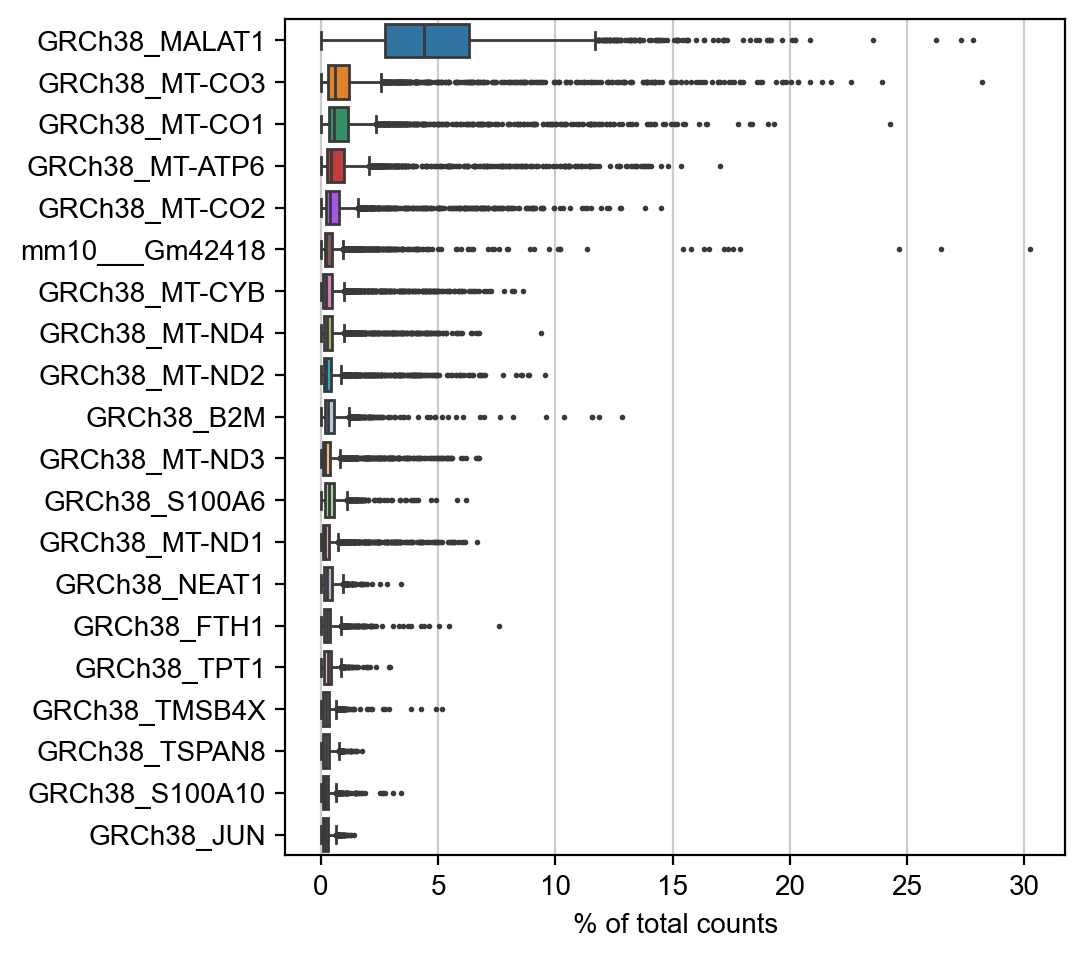

In [15]:
sc.pl.highest_expr_genes(adata, n_top=20, )

/tmp/ipykernel_4087995/1029756660.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


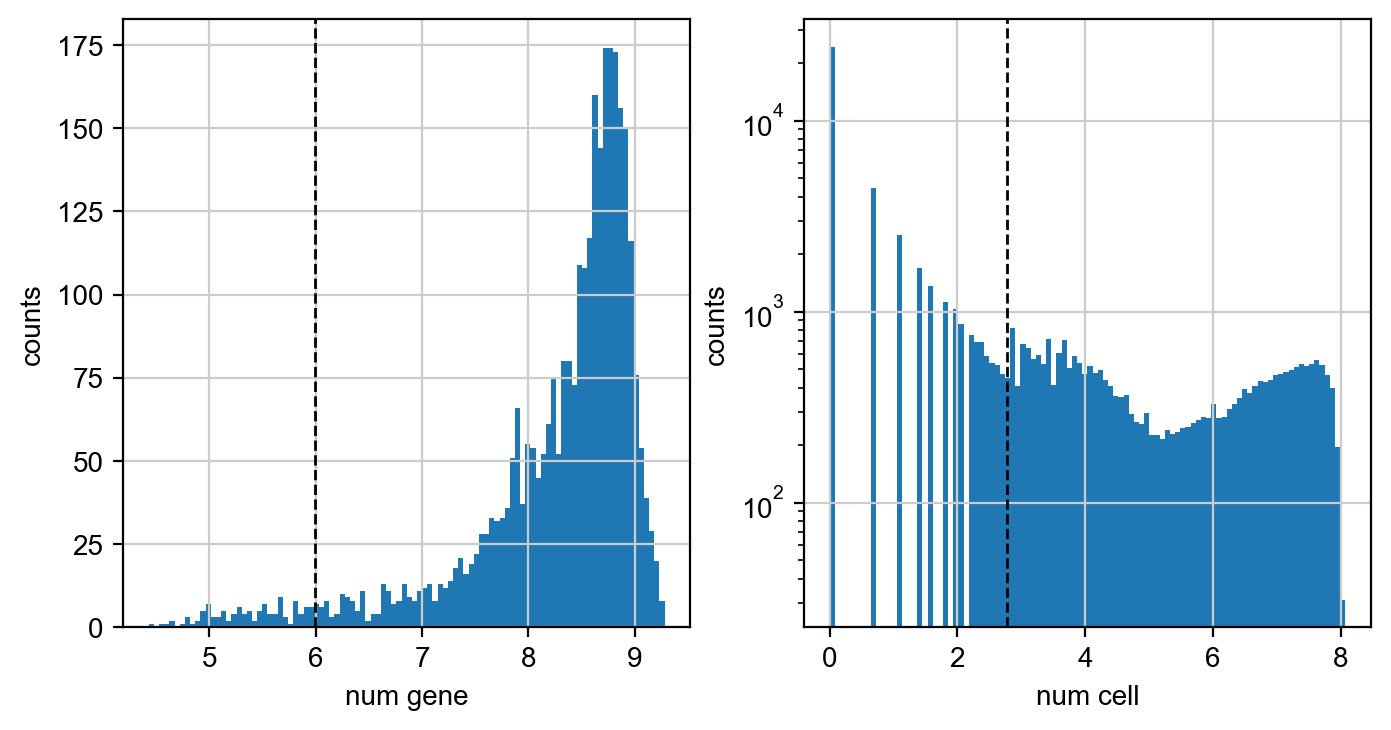

In [16]:
valX = adata.X>0
minGenes=400
minCells=15

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

numCellwExp = valX.sum(axis=1)
axs[0].hist(np.log(numCellwExp), bins=100)#, log=True)
axs[0].axvline(np.log(minGenes), color='k', linestyle='dashed', linewidth=1)
axs[0].set_xlabel('num gene')
axs[0].set_ylabel('counts')

numGeneswExp = valX.sum(axis=0).T
axs[1].hist(np.log(numGeneswExp+1), bins=100, log=True)
axs[1].axvline(np.log(minCells+1), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].axvline(np.log(600), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].axvline(np.log(4000), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].set_title('Gene means counts')
axs[1].set_xlabel('num cell')
axs[1].set_ylabel('counts')

fig.show()

In [17]:
sc.pp.filter_cells(adata, min_genes = minGenes)
sc.pp.filter_genes(adata, min_cells = minCells)

filtered out 115 cells that have less than 400 genes expressed
filtered out 41621 genes that are detected in less than 15 cells


In [18]:
adata = adata[:,np.logical_not(adata.var_names=="GRCh38_MALAT1")]

## Mouse QC

In [19]:
adata.var

,gene_ids,feature_types,genome,n_cells
GRCh38_AL627309.5,GRCh38_ENSG00000241860,Gene Expression,GRCh38,76
GRCh38_LINC01409,GRCh38_ENSG00000237491,Gene Expression,GRCh38,271
GRCh38_LINC01128,GRCh38_ENSG00000228794,Gene Expression,GRCh38,344
GRCh38_LINC00115,GRCh38_ENSG00000225880,Gene Expression,GRCh38,56
GRCh38_FAM41C,GRCh38_ENSG00000230368,Gene Expression,GRCh38,98
...,...,...,...,...
mm10___CAAA01118383.1,mm10___ENSMUSG00000063897,Gene Expression,mm10,21
mm10___Csprs,mm10___ENSMUSG00000062783,Gene Expression,mm10,18
mm10___Vamp7,mm10___ENSMUSG00000051412,Gene Expression,mm10,38
mm10___Tmlhe,mm10___ENSMUSG00000079834,Gene Expression,mm10,15


In [20]:
adata.var['mm'] = adata.var_names.str.startswith('mm10___') 
sc.pp.calculate_qc_metrics(adata, qc_vars=['mm'], log1p = False, inplace=True)

/tmp/ipykernel_4087995/1039509494.py:1: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['mm'] = adata.var_names.str.startswith('mm10___')


In [21]:
adata.obs

,PC106-ANS188-MRTX1-B0255,PC106-ANS189-MRTX2-B0256,PC106-ANS190-MRTX3-B0257,PC106-ANS191-MRTX4-B0258,n_genes,n_genes_by_counts,total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mm,pct_counts_mm
AAACCCAGTAGATTAG-1,23.0,3412.0,32.0,88.0,2418,2410,4287.0,17.681362,24.236063,33.006765,49.778400,49.0,1.142990
AAACCCAGTGTTGCCG-1,22.0,237.0,9.0,1559.0,5612,5600,21797.0,14.956187,22.168188,31.490572,47.387255,56.0,0.256916
AAACGAACAGTGCGCT-1,22.0,259.0,15.0,1677.0,4751,4738,13582.0,15.145045,23.074658,33.080548,48.196142,38.0,0.279782
AAACGAAGTCTGCAAT-1,22.0,7728.0,56.0,119.0,8637,8580,41355.0,11.294886,16.740418,23.992262,37.603675,108.0,0.261153
AAACGCTAGATCGGTG-1,6.0,187.0,11.0,1242.0,2744,2740,5704.0,25.070126,31.118513,39.428471,54.032258,79.0,1.384993
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTCAGCCTACG-1,33.0,292.0,13.0,472.0,4794,4785,14966.0,15.060804,22.764934,32.841107,48.743819,30.0,0.200454
TTTGTTGCAAGTATCC-1,24.0,250.0,13.0,1558.0,2742,2734,5367.0,23.495435,29.010620,36.948016,51.425377,42.0,0.782560
TTTGTTGCAGGTGTTT-1,660.0,10344.0,80.0,101.0,5870,5863,23852.0,14.506121,21.365085,30.152608,45.589468,56.0,0.234781
TTTGTTGGTGAGTAGC-1,39.0,11278.0,89.0,112.0,5263,5248,15792.0,13.893110,20.662361,29.299645,44.148936,32.0,0.202634


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


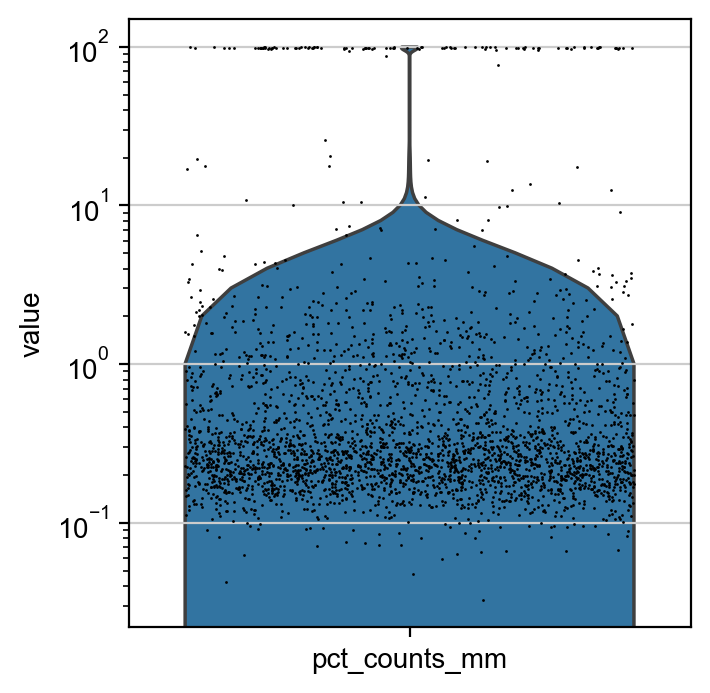

In [22]:
sc.pl.violin(adata, ['pct_counts_mm'], jitter=0.4, log=True)

In [23]:
sum(adata.obs.pct_counts_mm < 1)/len(adata.obs)

0.8400386224654007

In [24]:
adata = adata[adata.obs.pct_counts_mm < 1, :]
adata = adata[:,adata.var_names.str.startswith('GRCh38_')]
adata

View of AnnData object with n_obs × n_vars = 2610 × 20310
    obs: 'PC106-ANS188-MRTX1-B0255', 'PC106-ANS189-MRTX2-B0256', 'PC106-ANS190-MRTX3-B0257', 'PC106-ANS191-MRTX4-B0258', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mm', 'pct_counts_mm'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mm', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [25]:
adata.var_names = [g.split("38_")[1] for g in adata.var_names]
adata.var

,gene_ids,feature_types,genome,n_cells,mm,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
AL627309.5,GRCh38_ENSG00000241860,Gene Expression,GRCh38,76,False,76,0.025426,97.553911,79.0
LINC01409,GRCh38_ENSG00000237491,Gene Expression,GRCh38,271,False,271,0.107821,91.277760,335.0
LINC01128,GRCh38_ENSG00000228794,Gene Expression,GRCh38,344,False,344,0.122948,88.928227,382.0
LINC00115,GRCh38_ENSG00000225880,Gene Expression,GRCh38,56,False,56,0.018346,98.197618,57.0
FAM41C,GRCh38_ENSG00000230368,Gene Expression,GRCh38,98,False,98,0.032829,96.845832,102.0
...,...,...,...,...,...,...,...,...,...
AL354822.1,GRCh38_ENSG00000278384,Gene Expression,GRCh38,157,False,157,0.053428,94.946894,166.0
AL592183.1,GRCh38_ENSG00000273748,Gene Expression,GRCh38,807,False,807,0.380109,74.026392,1181.0
AC240274.1,GRCh38_ENSG00000271254,Gene Expression,GRCh38,86,False,86,0.028967,97.232057,90.0
AC004556.3,GRCh38_ENSG00000276345,Gene Expression,GRCh38,301,False,301,0.107499,90.312198,334.0


In [26]:
adata.var_names

Index(['AL627309.5', 'LINC01409', 'LINC01128', 'LINC00115', 'FAM41C', 'NOC2L',
       'KLHL17', 'PLEKHN1', 'AL645608.7', 'HES4',
       ...
       'MT-CYB', 'BX004987.1', 'AC145212.1', 'MAFIP', 'AC011043.1',
       'AL354822.1', 'AL592183.1', 'AC240274.1', 'AC004556.3', 'AC007325.4'],
      dtype='object', length=20310)

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


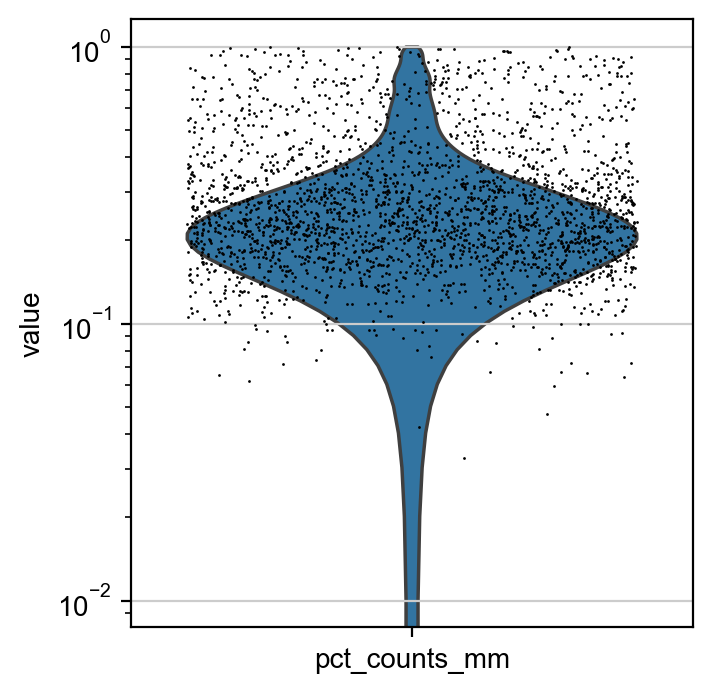

In [27]:
sc.pl.violin(adata, ['pct_counts_mm'],jitter=0.4, log = True)

In [28]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of human mitochondrial genes as 'hMT'
#adata.var['mmt'] = adata.var_names.str.startswith('mm10___mt-')  # annotate the group of mouse mitochondrial genes as 'mmt'

sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
#sc.pp.calculate_qc_metrics(adata, qc_vars=['mmt'], percent_top=None, log1p=False, inplace=True)

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


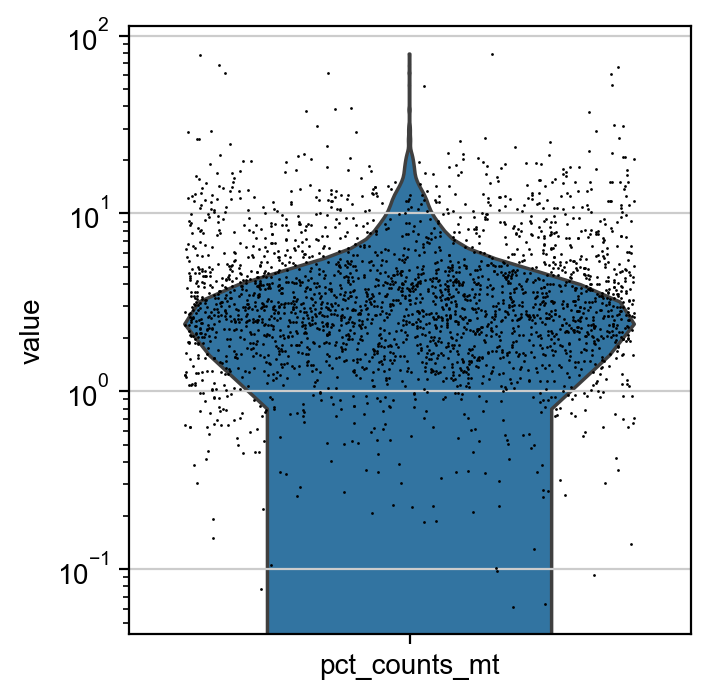

In [29]:
sc.pl.violin(adata, ["pct_counts_mt"], log=True, jitter=0.4)

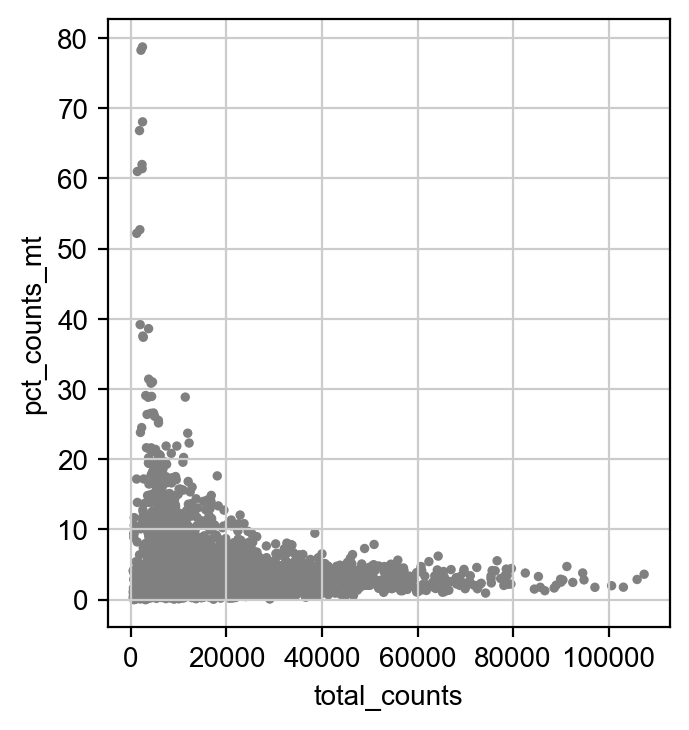

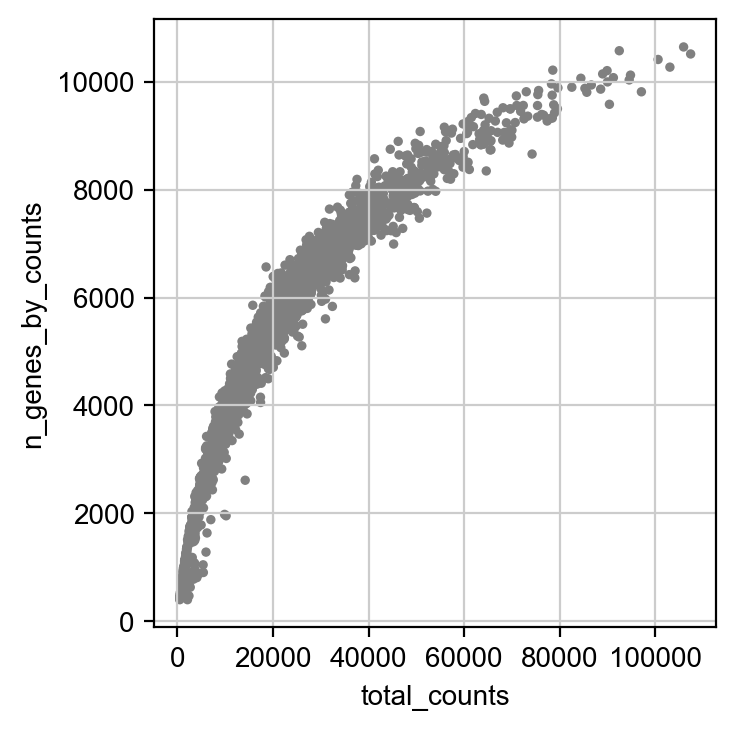

In [30]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

remove cells that have too much mito or could be doublets

In [31]:
adata = adata[adata.obs.n_genes_by_counts < 8000, :]
adata = adata[adata.obs.total_counts < 40000, :]
adata = adata[adata.obs.pct_counts_mt < 15, :]

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


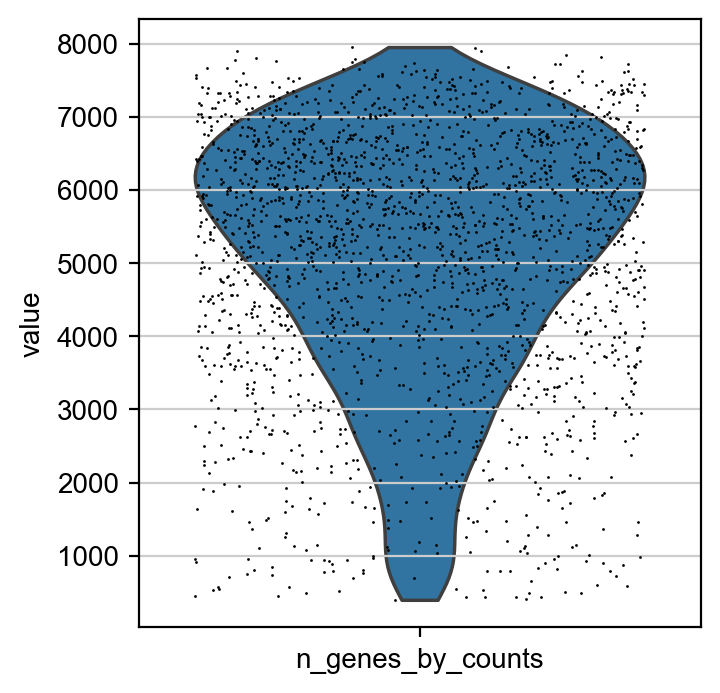

In [32]:
sc.pl.violin(adata, ['n_genes_by_counts'], jitter=0.4)

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


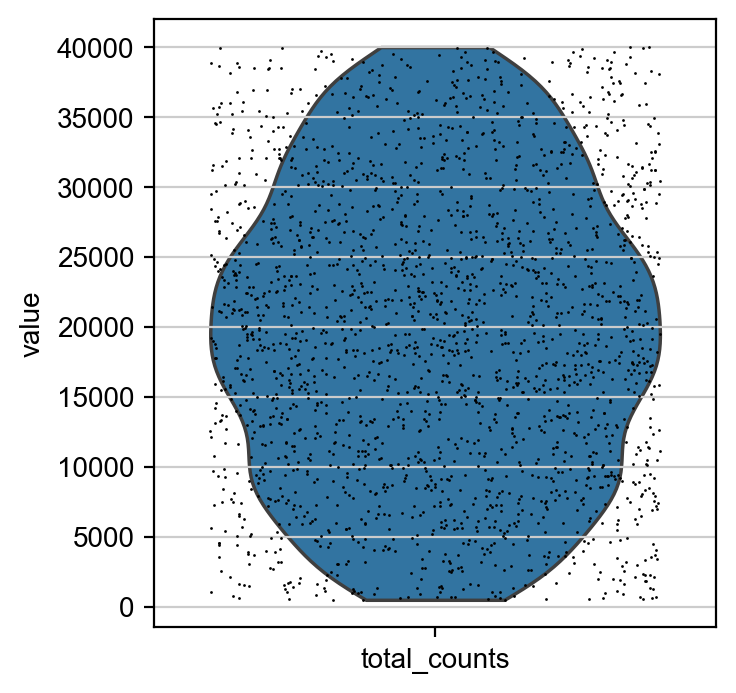

In [33]:
sc.pl.violin(adata, [ 'total_counts'], jitter=0.4)

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


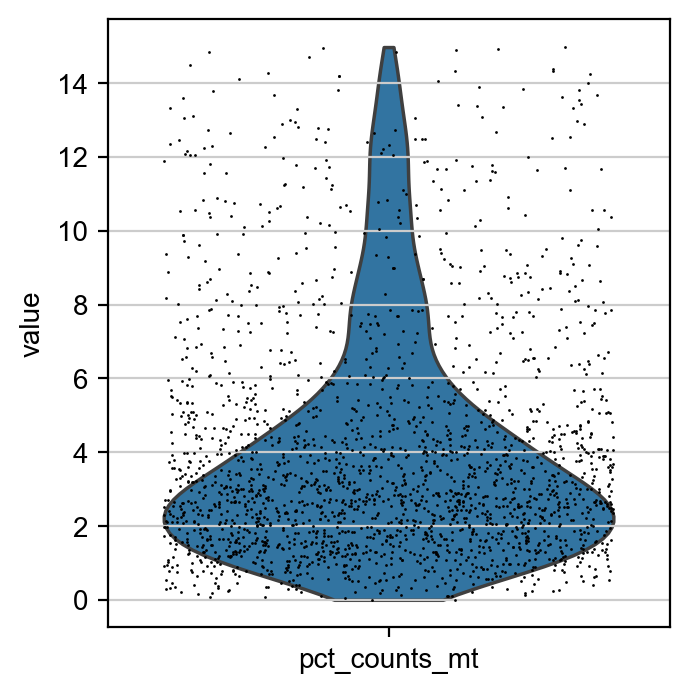

In [34]:
sc.pl.violin(adata, ['pct_counts_mt'], jitter=0.4)

save post QC scanpy

# Perform Demultiplex Hashing

In [35]:
hto.var_names

Index(['PC106-ANS188-MRTX1-B0255', 'PC106-ANS189-MRTX2-B0256',
       'PC106-ANS190-MRTX3-B0257', 'PC106-ANS191-MRTX4-B0258'],
      dtype='object')

In [36]:
#perfrom Hashsolo anlaysis
hashNames = ['PC106-ANS188-MRTX1-B0255', 'PC106-ANS189-MRTX2-B0256',
       'PC106-ANS190-MRTX3-B0257', 'PC106-ANS191-MRTX4-B0258']
sc.external.pp.hashsolo(adata, hashNames)#, priors=[0.01, 0.8, 0.19], number_of_noise_barcodes=None)
adata.obs.head()

Please cite HashSolo paper:
https://www.cell.com/cell-systems/fulltext/S2405-4712(20)30195-2


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/external/pp/_hashsolo.py:379: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["most_likely_hypothesis"] = results.loc[


,PC106-ANS188-MRTX1-B0255,PC106-ANS189-MRTX2-B0256,PC106-ANS190-MRTX3-B0257,PC106-ANS191-MRTX4-B0258,n_genes,n_genes_by_counts,total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,...,total_counts_mm,pct_counts_mm,total_counts_mt,pct_counts_mt,most_likely_hypothesis,cluster_feature,negative_hypothesis_probability,singlet_hypothesis_probability,doublet_hypothesis_probability,Classification
AAACCCAGTGTTGCCG-1,22.0,237.0,9.0,1559.0,5612,5593,21741.0,14.956187,22.168188,31.490572,...,56.0,0.256916,585.0,2.690769,1.0,0.0,2.441954e-03,0.951394,0.046164,PC106-ANS191-MRTX4-B0258
AAACGAACAGTGCGCT-1,22.0,259.0,15.0,1677.0,4751,4735,13544.0,15.145045,23.074658,33.080548,...,38.0,0.279782,160.0,1.181335,1.0,0.0,2.223799e-03,0.944500,0.053276,PC106-ANS191-MRTX4-B0258
AAAGAACAGCATTGAA-1,25.0,3091.0,43.0,3189.0,3650,3636,8915.0,18.800089,25.000000,33.470614,...,69.0,0.768032,726.0,8.143579,2.0,0.0,3.342946e-04,0.283573,0.716092,Doublet
AAAGGGCAGCGTACAG-1,13.0,1523.0,17.0,103.0,3761,3745,9767.0,19.060239,25.400061,34.226888,...,44.0,0.448476,940.0,9.624245,1.0,0.0,1.325633e-07,0.993700,0.006300,PC106-ANS189-MRTX2-B0256
AAAGGGCCAATTCGTG-1,20.0,307.0,12.0,2493.0,5482,5462,18324.0,15.725324,22.880618,31.651975,...,54.0,0.293830,495.0,2.701375,1.0,0.0,1.406692e-03,0.928877,0.069716,PC106-ANS191-MRTX4-B0258


visualize hashes

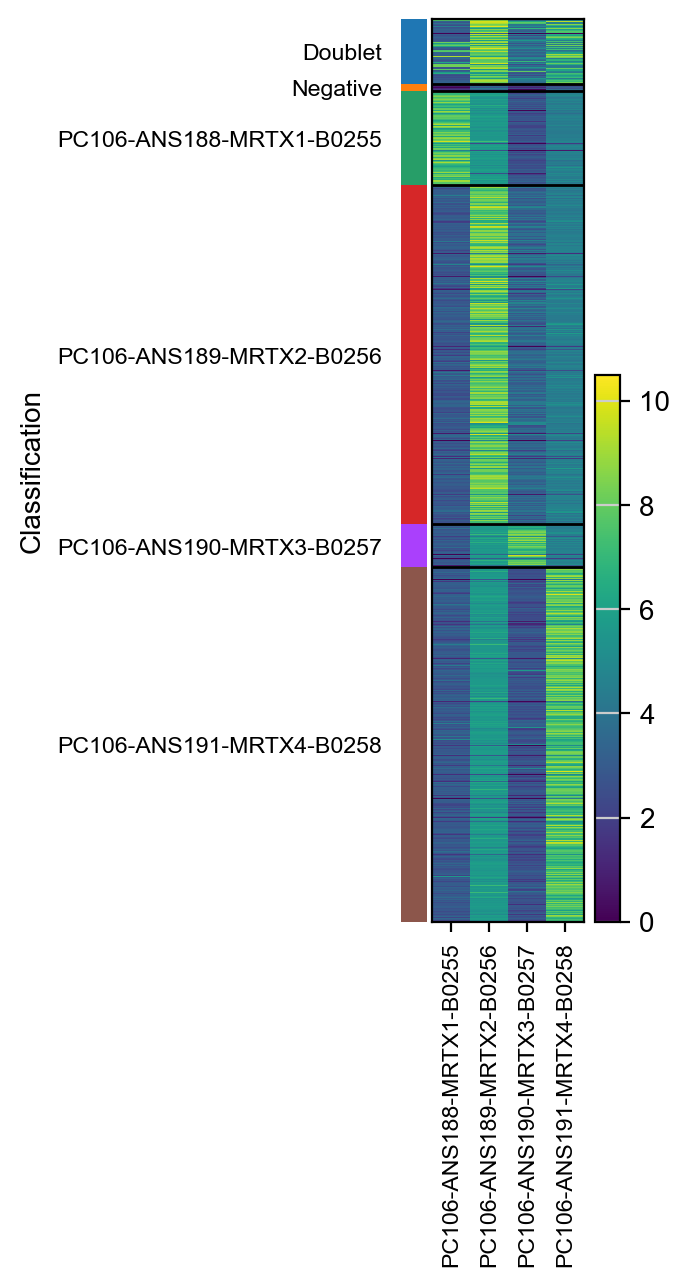

In [37]:
#output visulaization of hashing
sc.pl.heatmap(adata, hashNames, groupby="Classification", log=True, save = f"_{figName}_hash.png")

In [38]:
adata1 = adata

In [39]:
adata1

AnnData object with n_obs × n_vars = 2153 × 20310
    obs: 'PC106-ANS188-MRTX1-B0255', 'PC106-ANS189-MRTX2-B0256', 'PC106-ANS190-MRTX3-B0257', 'PC106-ANS191-MRTX4-B0258', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mm', 'pct_counts_mm', 'total_counts_mt', 'pct_counts_mt', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mm', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt'
    uns: 'Classification_colors'

# PDX Vehcile

In [40]:
adata = sc.read_10x_h5(f"{inDir}PC106_veh.h5", gex_only=False)
adata

reading data/PC106_veh.h5
 (0:00:01)


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 6772 × 68890
    var: 'gene_ids', 'feature_types', 'genome'

In [41]:
adata.var

,gene_ids,feature_types,genome
GRCh38_MIR1302-2HG,GRCh38_ENSG00000243485,Gene Expression,GRCh38
GRCh38_FAM138A,GRCh38_ENSG00000237613,Gene Expression,GRCh38
GRCh38_OR4F5,GRCh38_ENSG00000186092,Gene Expression,GRCh38
GRCh38_AL627309.1,GRCh38_ENSG00000238009,Gene Expression,GRCh38
GRCh38_AL627309.3,GRCh38_ENSG00000239945,Gene Expression,GRCh38
...,...,...,...
mm10___AC149090.1,mm10___ENSMUSG00000095041,Gene Expression,mm10
PC106-ANS188-MRTX1-B0255,MRTX1-PC106,Antibody Capture,
PC106-ANS189-MRTX2-B0256,MRTX2-PC106,Antibody Capture,
PC106-ANS190-MRTX3-B0257,MRTX3-PC106,Antibody Capture,


In [42]:
adata.var[-4:]

,gene_ids,feature_types,genome
PC106-ANS188-MRTX1-B0255,MRTX1-PC106,Antibody Capture,
PC106-ANS189-MRTX2-B0256,MRTX2-PC106,Antibody Capture,
PC106-ANS190-MRTX3-B0257,MRTX3-PC106,Antibody Capture,
PC106-ANS191-MRTX4-B0258,MRTX4-PC106,Antibody Capture,


In [43]:
numGenes = 4

hto = adata[:,-numGenes:]
adata = adata[:,:-numGenes]
adata.obs = pd.DataFrame(hto.X.todense(), columns=hto.var_names, index=adata.obs.index)

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [44]:
adata.obs

,PC106-ANS188-MRTX1-B0255,PC106-ANS189-MRTX2-B0256,PC106-ANS190-MRTX3-B0257,PC106-ANS191-MRTX4-B0258
AAACCCAAGAACGTGC-1,1.0,0.0,0.0,0.0
AAACCCAAGAGCTGCA-1,0.0,0.0,0.0,0.0
AAACCCAAGGTGGTTG-1,0.0,0.0,0.0,0.0
AAACCCACATCCTTCG-1,0.0,0.0,0.0,0.0
AAACCCAGTAACGATA-1,0.0,0.0,0.0,0.0
...,...,...,...,...
TTTGTTGGTGCTGTCG-1,0.0,0.0,0.0,0.0
TTTGTTGGTTCAAGTC-1,0.0,0.0,0.0,0.0
TTTGTTGTCGCCGAAC-1,0.0,0.0,0.0,0.0
TTTGTTGTCGGCCTTT-1,0.0,0.0,0.0,0.0


In [45]:
adata.var_names_make_unique()
adata.obs_names_make_unique()

In [46]:
adata.obs 

,PC106-ANS188-MRTX1-B0255,PC106-ANS189-MRTX2-B0256,PC106-ANS190-MRTX3-B0257,PC106-ANS191-MRTX4-B0258
AAACCCAAGAACGTGC-1,1.0,0.0,0.0,0.0
AAACCCAAGAGCTGCA-1,0.0,0.0,0.0,0.0
AAACCCAAGGTGGTTG-1,0.0,0.0,0.0,0.0
AAACCCACATCCTTCG-1,0.0,0.0,0.0,0.0
AAACCCAGTAACGATA-1,0.0,0.0,0.0,0.0
...,...,...,...,...
TTTGTTGGTGCTGTCG-1,0.0,0.0,0.0,0.0
TTTGTTGGTTCAAGTC-1,0.0,0.0,0.0,0.0
TTTGTTGTCGCCGAAC-1,0.0,0.0,0.0,0.0
TTTGTTGTCGGCCTTT-1,0.0,0.0,0.0,0.0


In [47]:
adata.var

,gene_ids,feature_types,genome
GRCh38_MIR1302-2HG,GRCh38_ENSG00000243485,Gene Expression,GRCh38
GRCh38_FAM138A,GRCh38_ENSG00000237613,Gene Expression,GRCh38
GRCh38_OR4F5,GRCh38_ENSG00000186092,Gene Expression,GRCh38
GRCh38_AL627309.1,GRCh38_ENSG00000238009,Gene Expression,GRCh38
GRCh38_AL627309.3,GRCh38_ENSG00000239945,Gene Expression,GRCh38
...,...,...,...
mm10___AC124606.1,mm10___ENSMUSG00000095523,Gene Expression,mm10
mm10___AC133095.2,mm10___ENSMUSG00000095475,Gene Expression,mm10
mm10___AC133095.1,mm10___ENSMUSG00000094855,Gene Expression,mm10
mm10___AC234645.1,mm10___ENSMUSG00000095019,Gene Expression,mm10


# Start QC
investigate highest expressed genes

normalizing counts per cell
    finished (0:00:00)


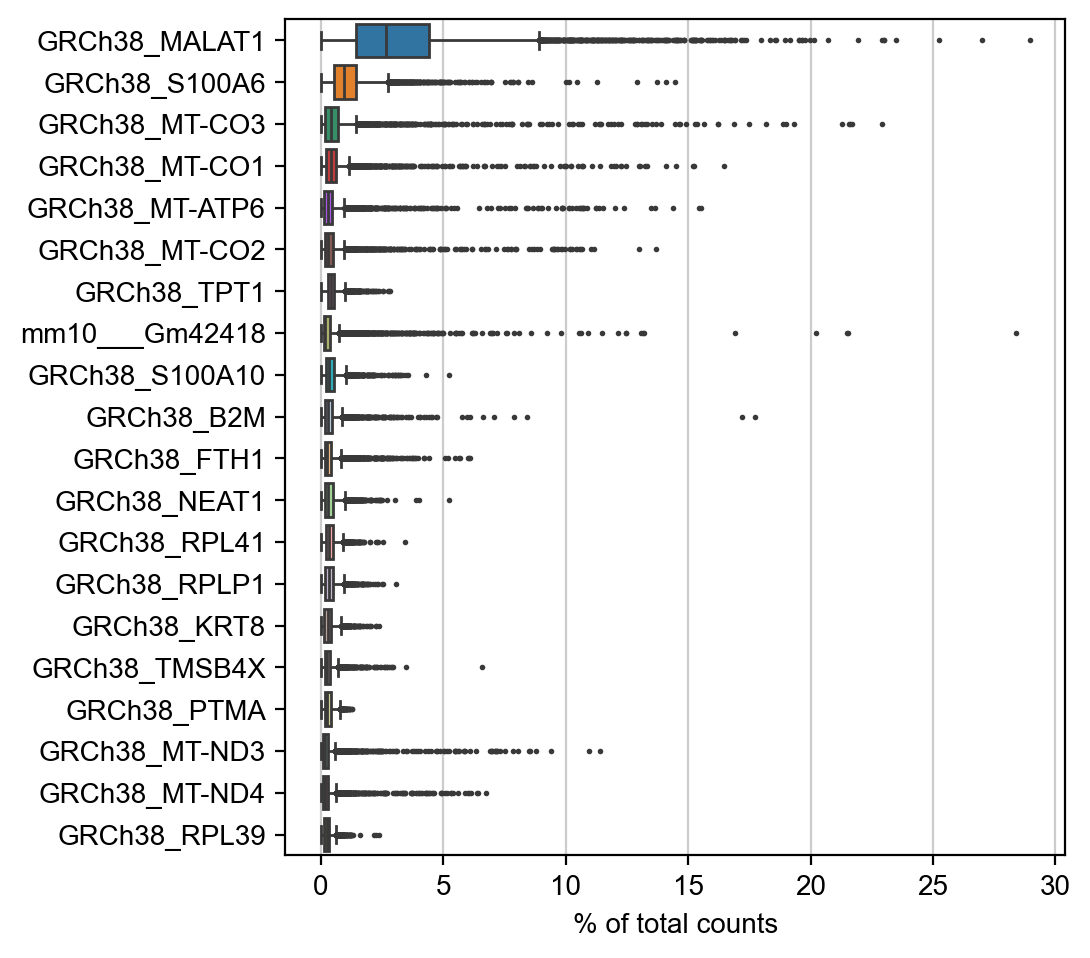

In [48]:
sc.pl.highest_expr_genes(adata, n_top=20, )

/tmp/ipykernel_4087995/3542297969.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


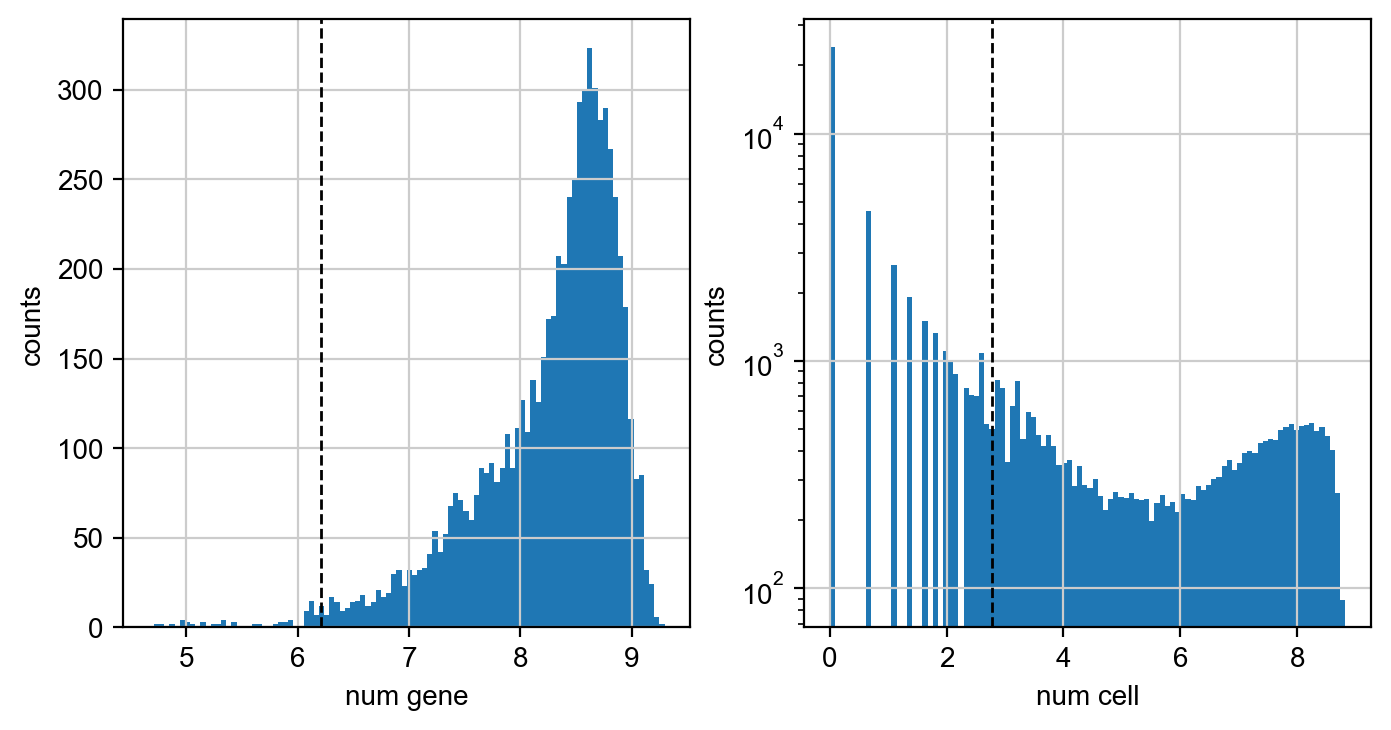

In [49]:
valX = adata.X>0
minGenes=500
minCells=15

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

numCellwExp = valX.sum(axis=1)
axs[0].hist(np.log(numCellwExp), bins=100)#, log=True)
axs[0].axvline(np.log(minGenes), color='k', linestyle='dashed', linewidth=1)
axs[0].set_xlabel('num gene')
axs[0].set_ylabel('counts')

numGeneswExp = valX.sum(axis=0).T
axs[1].hist(np.log(numGeneswExp+1), bins=100, log=True)
axs[1].axvline(np.log(minCells+1), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].axvline(np.log(600), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].axvline(np.log(4000), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].set_title('Gene means counts')
axs[1].set_xlabel('num cell')
axs[1].set_ylabel('counts')

fig.show()

In [50]:
sc.pp.filter_cells(adata, min_genes = minGenes)
sc.pp.filter_genes(adata, min_cells = minCells)

filtered out 90 cells that have less than 500 genes expressed
filtered out 42773 genes that are detected in less than 15 cells


In [51]:
adata = adata[:,np.logical_not(adata.var_names=="GRCh38_MALAT1")]

In [52]:
adata

View of AnnData object with n_obs × n_vars = 6682 × 26112
    obs: 'PC106-ANS188-MRTX1-B0255', 'PC106-ANS189-MRTX2-B0256', 'PC106-ANS190-MRTX3-B0257', 'PC106-ANS191-MRTX4-B0258', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'

## Mouse QC

In [53]:
adata.var

,gene_ids,feature_types,genome,n_cells
GRCh38_AL627309.1,GRCh38_ENSG00000238009,Gene Expression,GRCh38,19
GRCh38_AL627309.5,GRCh38_ENSG00000241860,Gene Expression,GRCh38,200
GRCh38_LINC01409,GRCh38_ENSG00000237491,Gene Expression,GRCh38,433
GRCh38_LINC01128,GRCh38_ENSG00000228794,Gene Expression,GRCh38,499
GRCh38_LINC00115,GRCh38_ENSG00000225880,Gene Expression,GRCh38,107
...,...,...,...,...
mm10___mt-Nd4,mm10___ENSMUSG00000064363,Gene Expression,mm10,238
mm10___mt-Nd5,mm10___ENSMUSG00000064367,Gene Expression,mm10,96
mm10___mt-Nd6,mm10___ENSMUSG00000064368,Gene Expression,mm10,27
mm10___mt-Cytb,mm10___ENSMUSG00000064370,Gene Expression,mm10,267


In [54]:
adata.var['mm'] = adata.var_names.str.startswith('mm10___') 
sc.pp.calculate_qc_metrics(adata, qc_vars=['mm'], log1p = False, inplace=True)

/tmp/ipykernel_4087995/1039509494.py:1: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['mm'] = adata.var_names.str.startswith('mm10___')


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


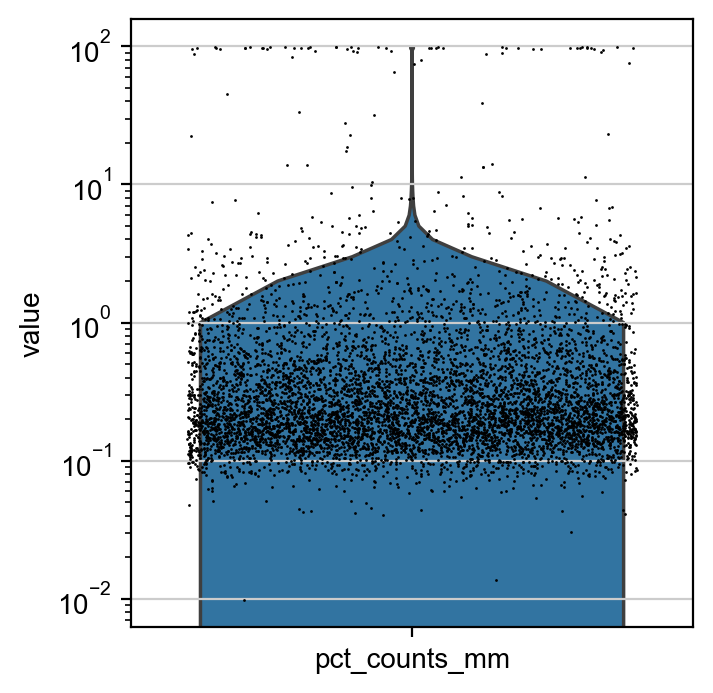

In [55]:
sc.pl.violin(adata, ['pct_counts_mm'], jitter=0.4, log=True)

In [56]:
sum(adata.obs.pct_counts_mm < 1)/len(adata.obs)

0.8967375037413948

In [57]:
adata = adata[adata.obs.pct_counts_mm < 1, :]
adata = adata[:,adata.var_names.str.startswith('GRCh38_')]
adata

View of AnnData object with n_obs × n_vars = 5992 × 22085
    obs: 'PC106-ANS188-MRTX1-B0255', 'PC106-ANS189-MRTX2-B0256', 'PC106-ANS190-MRTX3-B0257', 'PC106-ANS191-MRTX4-B0258', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mm', 'pct_counts_mm'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mm', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [58]:
adata.var_names = [g.split("38_")[1] for g in adata.var_names]
adata.var

,gene_ids,feature_types,genome,n_cells,mm,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
AL627309.1,GRCh38_ENSG00000238009,Gene Expression,GRCh38,19,False,19,0.002843,99.715654,19.0
AL627309.5,GRCh38_ENSG00000241860,Gene Expression,GRCh38,200,False,200,0.030829,97.006884,206.0
LINC01409,GRCh38_ENSG00000237491,Gene Expression,GRCh38,433,False,433,0.073032,93.519904,488.0
LINC01128,GRCh38_ENSG00000228794,Gene Expression,GRCh38,499,False,499,0.083209,92.532176,556.0
LINC00115,GRCh38_ENSG00000225880,Gene Expression,GRCh38,107,False,107,0.016312,98.398683,109.0
...,...,...,...,...,...,...,...,...,...
AL592183.1,GRCh38_ENSG00000273748,Gene Expression,GRCh38,1134,False,1134,0.221491,83.029033,1480.0
AC240274.1,GRCh38_ENSG00000271254,Gene Expression,GRCh38,66,False,66,0.010177,99.012272,68.0
AC004556.3,GRCh38_ENSG00000276345,Gene Expression,GRCh38,328,False,328,0.050284,95.091290,336.0
AC007325.4,GRCh38_ENSG00000278817,Gene Expression,GRCh38,39,False,39,0.005837,99.416342,39.0


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


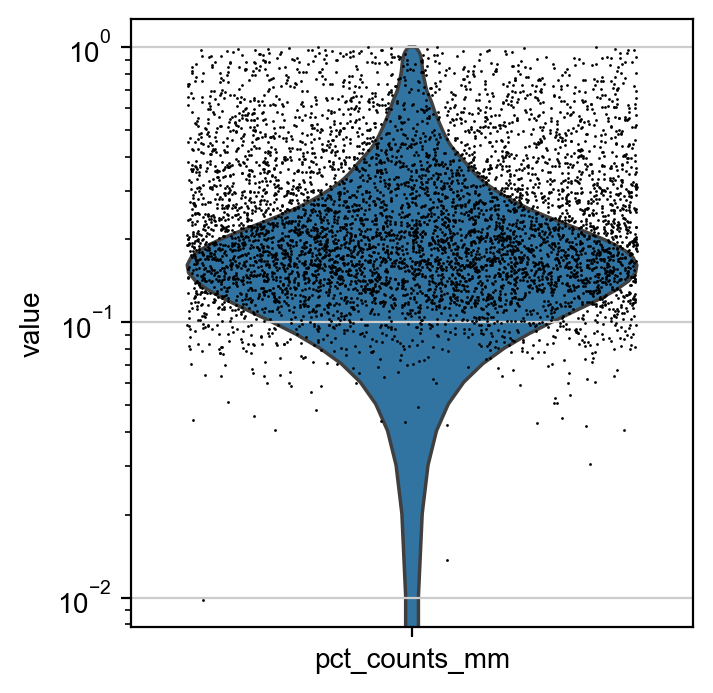

In [59]:
sc.pl.violin(adata, ['pct_counts_mm'],jitter=0.4, log = True)

In [60]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of human mitochondrial genes as 'hMT'
#adata.var['mmt'] = adata.var_names.str.startswith('mm10___mt-')  # annotate the group of mouse mitochondrial genes as 'mmt'

sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
#sc.pp.calculate_qc_metrics(adata, qc_vars=['mmt'], percent_top=None, log1p=False, inplace=True)

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


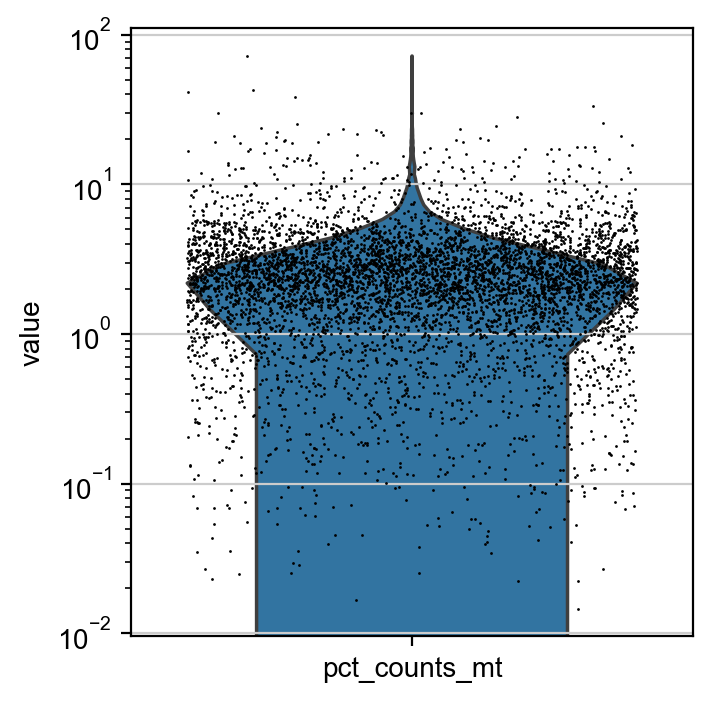

In [61]:
sc.pl.violin(adata, [ 'pct_counts_mt'], jitter=0.4, log=True)

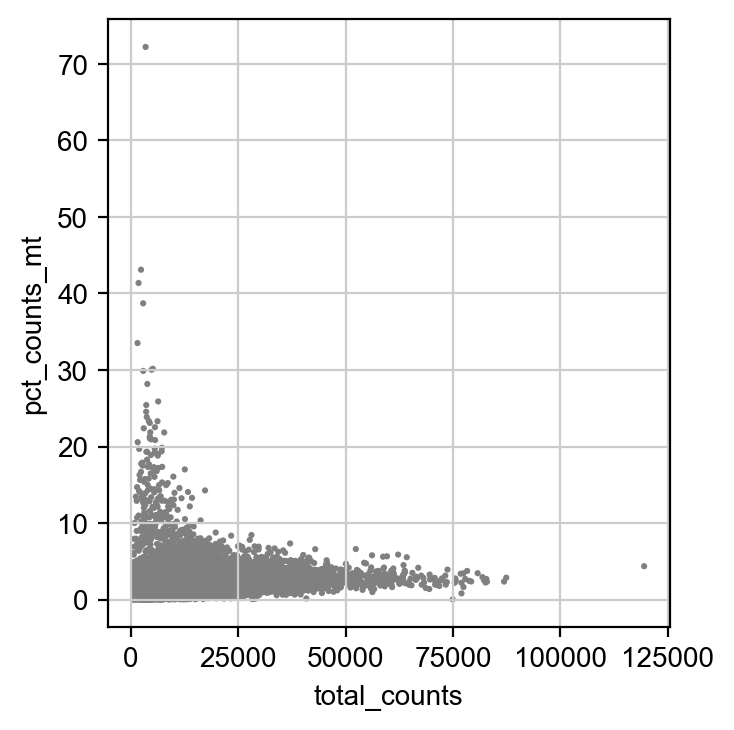

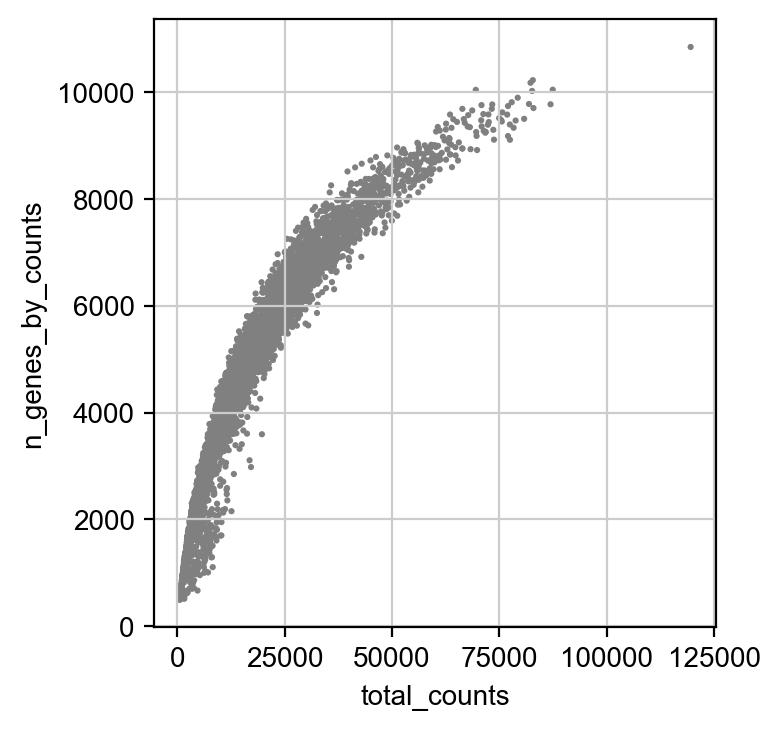

In [62]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

remove cells that have too much mito or could be doublets

In [63]:
adata = adata[adata.obs.n_genes_by_counts < 8000, :]
adata = adata[adata.obs.total_counts < 40000, :]
adata = adata[adata.obs.pct_counts_mt < 10, :]

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


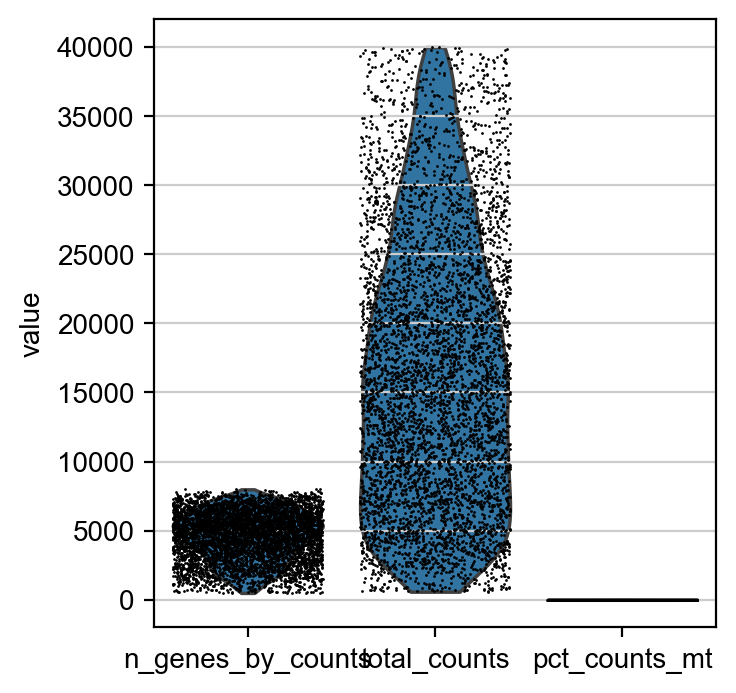

In [64]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4)

# Perform Demultiplex Hashing

In [65]:
hto.var_names

Index(['PC106-ANS188-MRTX1-B0255', 'PC106-ANS189-MRTX2-B0256',
       'PC106-ANS190-MRTX3-B0257', 'PC106-ANS191-MRTX4-B0258'],
      dtype='object')

In [66]:
#perfrom Hashsolo anlaysis
#hashNames = ['PC106-ANS188-MRTX1-B0255', 'PC106-ANS189-MRTX2-B0256',
#       'PC106-ANS190-MRTX3-B0257', 'PC106-ANS191-MRTX4-B0258']
#sc.external.pp.hashsolo(adata, hashNames)#, priors=[0.01, 0.8, 0.19], number_of_noise_barcodes=None)
#adata.obs.head()

visualize hashes

In [67]:
#output visulaization of hashing
#sc.pl.heatmap(adata, hashNames, groupby="Classification", log=True, save = f"_{figName}_hash.png")

count each hash

In [68]:
#from collections import Counter

#Counter(adata.obs["Classification"])

In [69]:
#singlets = [x in hto.var_names for x in adata.obs["Classification"] ]
#adata = adata[singlets,]

In [70]:
sc.pp.normalize_total(adata1,target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


In [71]:
sc.pp.log1p(adata1)

In [72]:
sc.pp.normalize_total(adata,target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [73]:
sc.pp.log1p(adata)

In [74]:
adata2 = adata

In [75]:
adata = an.concat([adata1,adata2], label="treatment", keys=["mrtx","veh"], join="outer",index_unique="-")
adata.var_names_make_unique()
adata.obs_names_make_unique()
adata

AnnData object with n_obs × n_vars = 7544 × 22243
    obs: 'PC106-ANS188-MRTX1-B0255', 'PC106-ANS189-MRTX2-B0256', 'PC106-ANS190-MRTX3-B0257', 'PC106-ANS191-MRTX4-B0258', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mm', 'pct_counts_mm', 'total_counts_mt', 'pct_counts_mt', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'treatment'

In [76]:
resultsFileQC

'write/pdacPdxMrtx106_QC.h5ad'

In [113]:
adata.write(resultsFileQC)